##**Motive behind the project**

Being quantitative finance enthusiasts, this project was an opportunity for our team to learn how the technical indicators work and are applied in real life. Through this project, we understood how to formulate new trading strategies using multiple indicators, backtest them on different markets and comapre the outcomes with other existing strategies. This project gave us a glimpse of real life problems which a quantitative researcher has to face in his professional life.

## **Install the packages**

In [ ]:
!pip install yfinance
!pip install pandas 
!pip install matplotlib
!pip install numpy
!pip install nsetools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Import the Libraries**

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

## **Implement on Different Market Index**
Here we have used three indices - NIFTY50, S&P500 and SSE COMPOSITE INDEX to test our strategies

                          

In [ ]:
indices = ['^NSEI', '000001.SS','^GSPC']

# ^NSEI - NIFTY50 
# 000001.SS - SSE COMPOSITE INDEX
# ^GSPC - S&P500 

INDEX = ['NIFTY50','SSE COMPOSITE INDEX','S&P500']

## **Download the Market Indices Data**
The '**download_data**' function is used to download historical data from **yfinance** library, for a given set of indices. The underlying code downloads the data for the past '**4 years**' from the present day. This timeframe can also be changed by making a small change in the code present. It takes a list of indices as input and returns a DataFrame containing the closing prices for those indices.
The '**show_data**' function is used to plot the data in a given DataFrame. It takes a DataFrame as input and plots the data using the '**Matplotlib**' library. It then shows the plot using the '**plt.show()**' function.



In [ ]:
def download_data(index1):
  # Create an empty dictionary to store the data for each index
  index_data = {}

  # Loop through the indices in index1
  for index in index1:
    
    # Get the closing prices for the current index
    ticker = yf.Ticker(index)

    # Download the data of past 4 years
    index_data['Close'] = ticker.history(period='4y')['Close']

  # Return the data as a DataFrame
  return pd.DataFrame(index_data)


def show_data(data):
  # Plot the data in the DataFrame using the Matplotlib library
  data.plot(figsize=(16, 6))

  # Show the plot
  plt.show()

## **MACD (Moving Average Convergence Divergence)**

Moving average convergence/divergence (MACD, or MAC-D) is a '**trend-following momentum indicator**' that shows the relationship between two exponential moving averages (EMAs) of a security’s price. It is calculated by subtracting the fast exponential moving average (EMA) from the slow EMA. A signal line, which is the 9-day EMA of the MACD, is then plotted on top of the MACD. MACD Histogram is the difference between MACD line and the signal line.

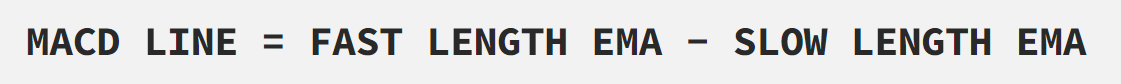

(We use the standard slow length - 26 days and fast length - 12 days)

## **Calculate MACD and SIGNAL lines**
The '**macd**' function takes a DataFrame as input and calculates the MACD and signal line for that DataFrame. It then returns the DataFrame with the MACD and signal line added as new columns.
The '**show_macd**' function uses matplotlib to create a figure with two subplots. The first subplot shows the '**closing prices**' of the asset, and the second subplot shows the '**MACD, signal line and histogram**'.



In [ ]:
def macd(dmacd):
    # Calculate the Short Term Exponential Moving Average of the closing prices
    dmacd['ShortEMA']=dmacd['Close'].ewm(span=12, adjust=False).mean() 

    # Calculate the Long Term Exponential Moving Average of the closing prices 
    dmacd['LongEMA']= dmacd['Close'].ewm(span=26, adjust=False).mean() 

    # Calculate the Moving Average Convergence/Divergence (MACD) by 
    # subtracting the 26-day EMA from the 12-day EMA
    dmacd['MACD'] = dmacd['ShortEMA'] - dmacd['LongEMA']

    # Calculate the signal line by taking the 9-day EMA of the MACD
    dmacd['signal'] = dmacd['MACD'].ewm(span=9, adjust=False).mean()

    # Calculate the difference between the MACD and the signal line
    dmacd['hist']= dmacd['MACD'] - dmacd['signal']

    # Return the DataFrame with the MACD and signal line columns added
    return dmacd

def show_macd(df1, idx_name):
    fig, axs = plt.subplots(2, sharex=True, figsize=(20,15))
    fig.suptitle(idx_name,fontweight="bold")

    # Plot the closing prices 
    axs[0].plot(df1['Close'],label='Close') 
    axs[0].legend(loc='upper left')
    axs[0].grid()

    # Plot the MACD line with blue color
    axs[1].plot(df1['MACD'], label='MACD', color = 'blue')

    # Plot the signal line with red color
    axs[1].plot(df1['signal'], label='Signal Line', color = 'Red') 

    # Plot the histogram
    axs[1].plot(df1['hist'], label='Histogram', linestyle = '--', color = 'Yellow')
    
    axs[1].legend(loc='upper left')
    axs[1].grid()

## **MACD STRATEGY**
We use a simple strategy to get buy and sell signals using the MACD indicator.

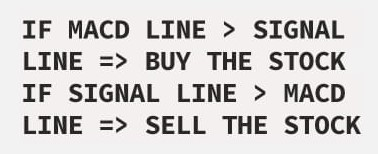

## **Calculate returns using the MACD strategy**
The strategy implemented in this code **buys** when the MACD line crosses the signal line from '**below**' and **sells** when the MACD line crosses the signal line from '**above**'. We are using a flag variable, **position**, to track whether a position is currently open or not. If a position is not open and the MACD is above the signal line, it generates a buy signal and sets the position flag to **True**. If a position is open and the MACD is below the signal line, it generates a sell signal and sets the position flag to **False**.
We then evaluate the performance of the strategy by using the '**find_returns_macd**' function.


In [ ]:
def find_returns_macd(dataset, index):
  # Generate Buy and Sell signals using the MACD strategy
  # Create empty lists to store the buy and sell signals
  buy = []
  sell = []

  # Create a flag variable to track whether a position is currently open
  position = False

  # Loop through the data in the dataset
  for i in range(len(dataset)):

    # If the MACD is above the signal line
    if dataset.MACD[i] > dataset.signal[i]:

      # If a position is not currently open, then generate a buy signal
      if position == False:
        buy.append(i)

        # Set the position flag to True to indicate that a position is now open
        position = True

    # If the MACD is below the signal line
    elif dataset.MACD[i] < dataset.signal[i]:

      # If a position is currently open, then generate a sell signal
      if position == True:
        sell.append(i)

        # Set the position flag to False to indicate that the position is now closed
        position = False
  

  # Concatenate the closing prices at the buy and sell signal indices from the dataset
  merged= pd.concat([dataset.iloc[buy].Close , dataset.iloc[sell].Close] , axis=1)

  # Set the column names of the DataFrame to 'Buy' and 'Sell'
  merged.columns = ['Buy', 'Sell']

  # Calculate the total profit by subtracting the closing price at the sell signal
  # from the closing price at the buy signal, and shifting the sell signal down by one
  totalprofit = merged.shift(-1).Sell-merged.Buy
  
  # Calculate the percentage profit by dividing the total profit by the closing price at the buy signal
  percent_profits = (merged.shift(-1).Sell-merged.Buy) / merged.Buy

  return percent_profits.sum()

## **MACD Plots & Returns**

This code is looping through the indices. For each index in the list, it:

1. Downloads the data for that index using the '**download_data**' function
2. Calculates the MACD and signal line for the data using the '**macd**' function
3. Plots the MACD and signal line using the '**show_macd**' function
4. Calculates the buy and sell signals and returns from the data using the '**find_returns_macd**' function
5. Present the returns generated in a tabular form by creating a seperate dataframe '**returns_macd**'

,INDICES,MACD RETURNS
1,NIFTY50,0.367171
2,SSE COMPOSITE INDEX,0.130354
3,S&P500,0.357748


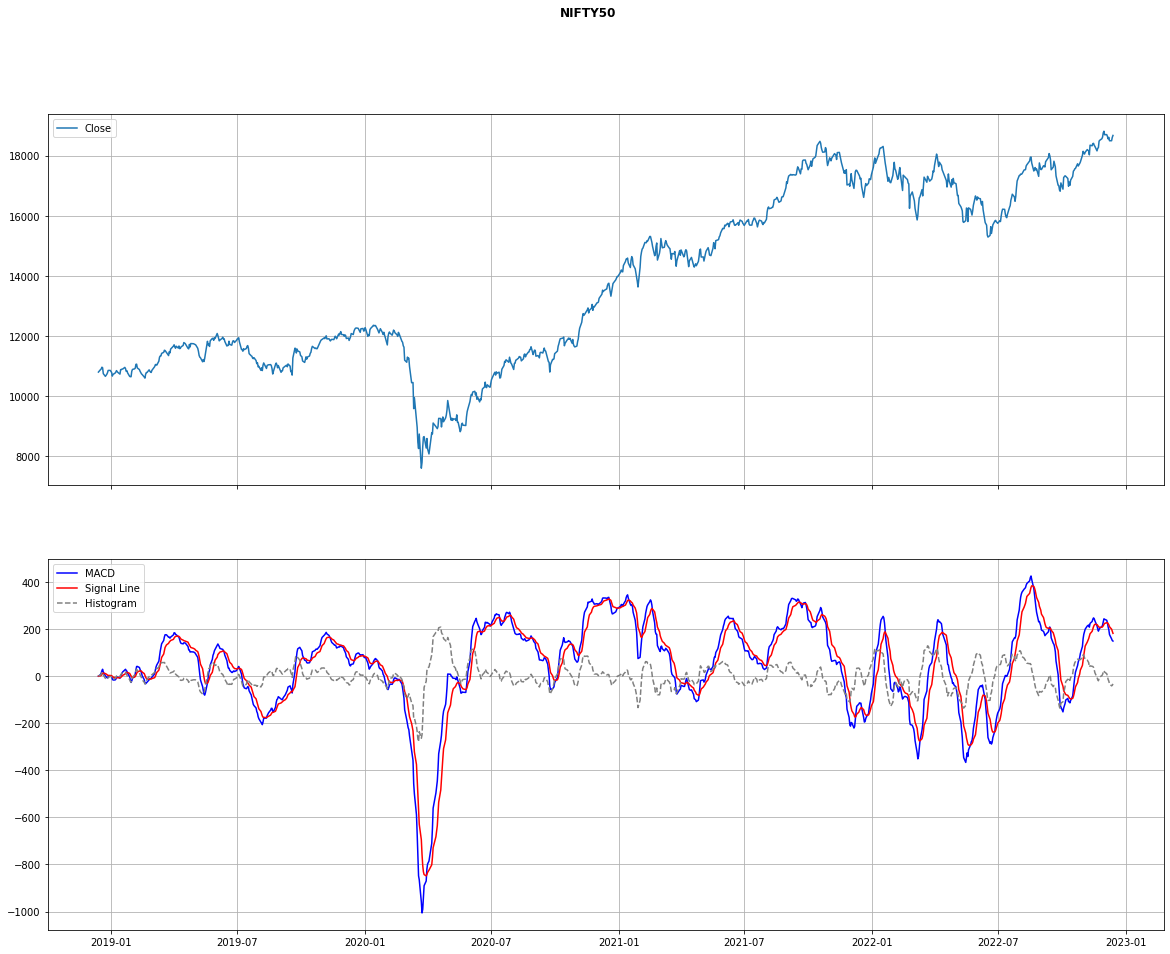

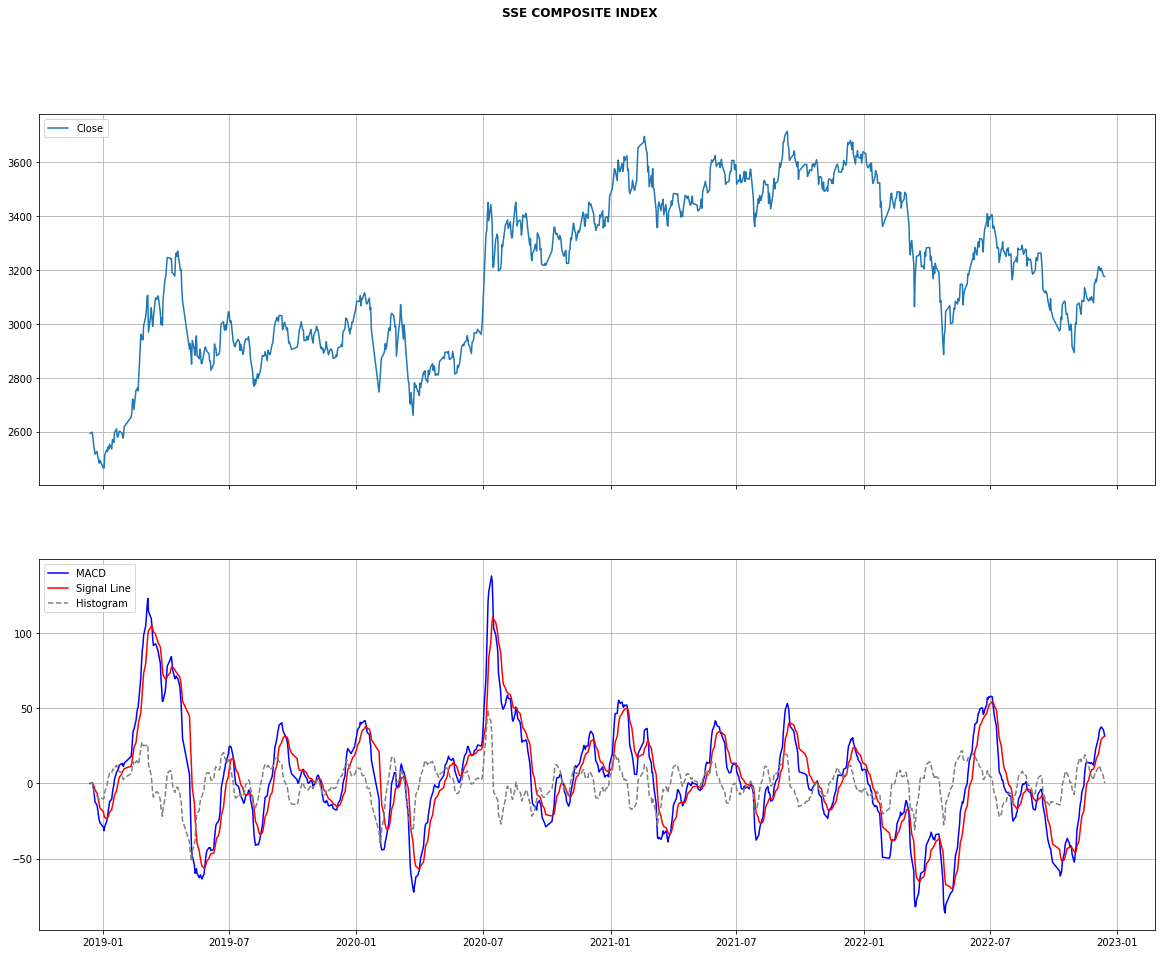

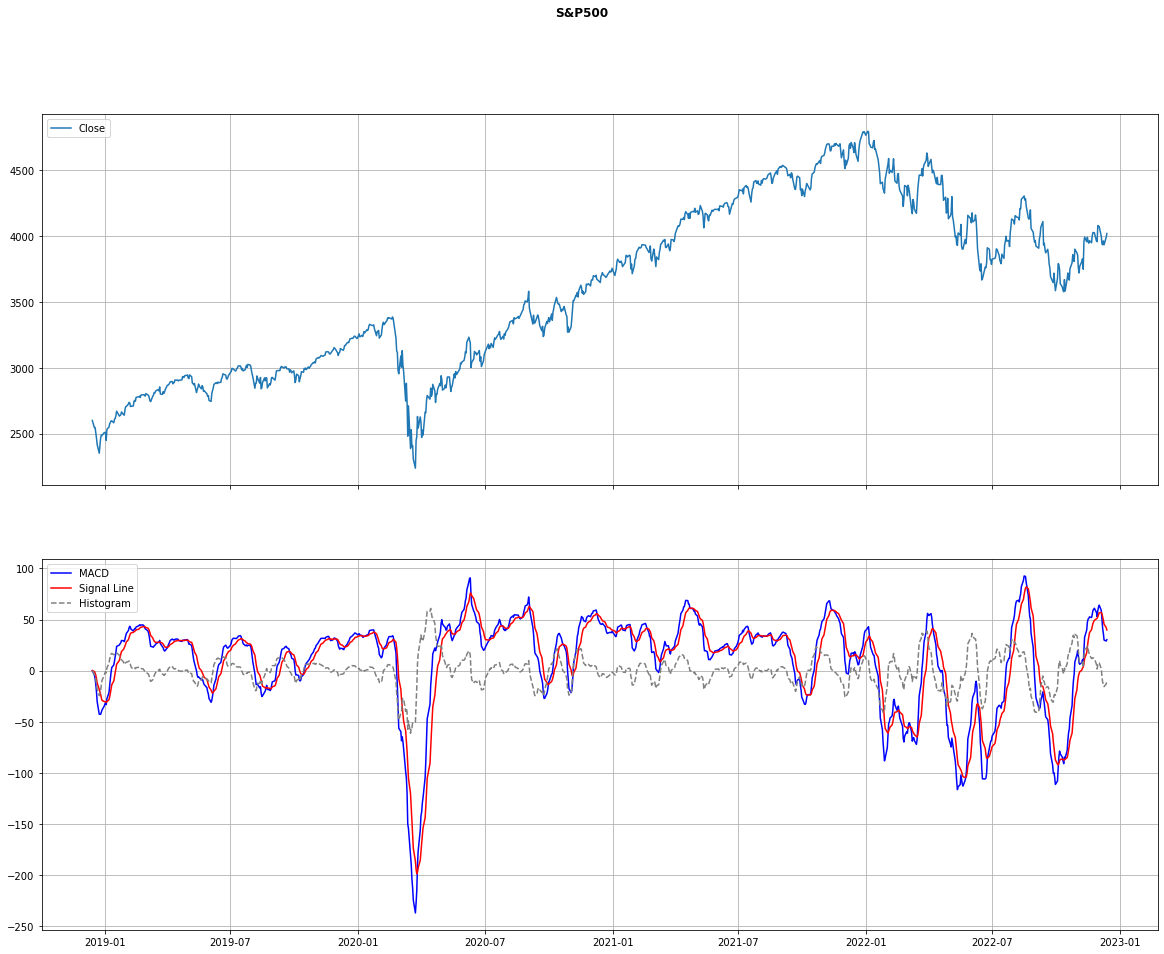

In [ ]:
# Initialize an empty list to store the returns of different indices 
macd_ret = []
# Initialize a counter variable to keep track of the current index
i = 0
for indeX in indices:
  x = [indices[i]]
  
  # Download the data for the current index
  dataset1 = download_data(x)

  # Calculate the MACD and signal line for the data
  macD = macd(dataset1)

  # Plot the MACD and signal line for the data
  show_macd(macD, INDEX[i])

  # Calculate the buy and sell signals and returns for the data
  ret=find_returns_macd(dataset1, indices[i])
  macd_ret.append(ret)
  i=i+1

# Create a DataFrame 
returns_macd = pd.DataFrame(list(zip(INDEX,macd_ret )),
                   
               # Name the columns
               columns =['INDICES', 'MACD RETURNS'])

# Set the index
returns_macd.set_index([pd.Index([1, 2, 3])])

# **Bollinger Bands**

These are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity, using a formulaic method which display a graphical band (the envelope maximum and minimum of moving averages) and volatility (expressed by the width of the envelope) in one two-dimensional chart.



## **Calculate the Bollinger Bands**
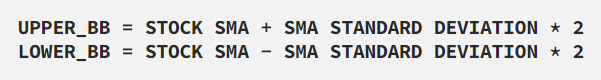

In the '**bb**' function, we first create several empty columns in the DataFrame '**db**' to store the results of the calculations. The code then loops through the data in db and calculates the Simple Moving Average (SMA) for the previous 14 days, the standard deviation (STD) for the previous 14 days, and the upper and lower Bollinger Bands (BU and BL) based on the SMA and STD. Once the calculations are complete, the code returns the original DataFrame with the '**SMA**', '**STD**', '**BU**', and '**BL**' columns added. These columns can be used to plot the Bollinger Bands and analyze the volatility of the financial instrument.

Then use '**matplotlib**' in the '**show__bb**' function to create a figure with two subplots. The first subplot shows the closing prices of the asset, and the second subplot shows the closing prices along with the upper and lower Bollinger Bands.

In [ ]:
def bb(db):
  # Create columns in the DataFrame to store the SMA, STD, BU, and BL
    db['SMA']=np.nan
    db['STD']=np.nan
    db['BU']=np.nan
    db['BL']=np.nan

    # Loop through the data starting at the 15th element
    for x in range(15,len(db)):

        # Calculate the SMA for the previous 14 days
        db['SMA'][x]=db['Close'][(x-14):x].mean()

        # Calculate the STD for the previous 14 days
        db['STD'][x]=db['Close'][(x-14):x].std()

        # Calculate the upper Bollinger Band (BU) based on the SMA and STD
        db['BU'][x]=(db['SMA'][x]+db['STD'][x]*2)

        # Calculate the lower Bollinger Band (BL) based on the SMA and STD
        db['BL'][x]=(db['SMA'][x]-db['STD'][x]*2)

    # Return the original DataFrame with the SMA, STD, BU, and BL columns added
    return db
    
def show_bb(df1, idx_name):
    fig, axs = plt.subplots(2, sharex=True, figsize=(20,15))
    fig.suptitle(idx_name,fontweight="bold")

    # Plot the closing prices
    axs[0].plot(df1['Close'],label='Close')
    axs[0].legend(loc='upper left')
    axs[0].grid()
    axs[1].plot(df1['Close'],label='Close')

    # Plot the upper band 
    axs[1].plot(df1['BU'],label='Upper Band')

    # Plot the lower band 
    axs[1].plot(df1['BL'],label='Lower Band')
    
    axs[1].legend(loc='upper left')
    axs[1].grid()

    # Fill the area between the bands 
    plt.fill_between (df1.index, df1.BU,df1.BL, color ='grey', alpha = 0.3)

## **B-BANDS Strategy**
We use a simple strategy to get buy and sell signals from the B-Bands indicator.

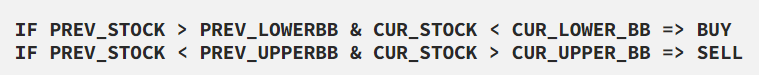

## **Calculate returns using the B-BANDS strategy**

We define '**find_returns_bb**' that takes two arguments- dataset (dataframe containing the closing prices and Bollinger bands) and index (for which the bollinger bands were calculated). The function generates buy and sell signals based on the Bollinger Bands strategy. It loops through the data in dataset and checks whether the previous day's value of the lower Bollinger Band (BL) is greater than the previous day's closing price. If so, it checks whether the current day's value of the BL is less than the current day's closing price. If both of these conditions are satisfied, the function appends the current index to the buy list and sets the '**open_pos**' flag to True to indicate that a position has been opened. If open_pos is True, the function checks whether the previous day's value of the upper Bollinger Band (BU) is less than the previous day's closing price. If so, it checks whether the current day's value of the BU is greater than the current day's closing price. If both of these conditions are satisfied, the function appends the current index to the sell list and sets the open_pos flag to False to indicate that the position has been closed.

Once the buy and sell signals have been generated, the function calculates the returns based on the buy and sell signals. It concatenates the closing prices at the buy and sell indices and calculates the difference between the sell and buy prices. This difference is the total profit made from the trade, and the function calculates the percentage profit by dividing the total profit by the buy price.





In [ ]:
def find_returns_bb(dataset, index):
  # Initialize the buy and sell lists
  buy=[]
  sell=[]

  # Initialize a variable to track whether we have an open position
  open_pos = False

  # Iterate over the dataset
  for i in range(len(dataset)):

      # Check if we do not have an open position
      if open_pos == False:

       # Check if the previous BL value was above the previous Close value
       if dataset.BL[i-1] > dataset.Close[i-1]:

         # Check if the current BL value is below the current Close value
         if dataset.BL[i] < dataset.Close[i]:

            #Append the current index to the buy list
            buy.append(i)

            # Set the open_pos variable to True
            open_pos= True

      # Check if we have an open position
      elif open_pos == True: 

        # Check if the previous BU value was below the previous Close value
        if dataset.BU[i-1] < dataset.Close[i-1]:

          # Check if the current BU value is above the current Close value
          if dataset.BU[i] > dataset.Close[i]:

            # Append the current index to the sell list
            sell.append(i)

            # Set the open_pos variable to False
            open_pos = False 

  # Concatenate the Close columns at the buy and sell indices
  merged= pd.concat([dataset.iloc[buy].Close , dataset.iloc[sell].Close] , axis=1)

  # Rename the columns to Buy and Sell
  merged.columns = ['Buy', 'Sell']

  # Calculate the total profit by subtracting the Sell values from the Buy values
  totalprofit = merged.shift(-1).Sell-merged.Buy
  
  # Calculate the percentage profits by dividing the total profit by the Buy values
  percent_profits = (merged.shift(-1).Sell-merged.Buy) / merged.Buy

  return percent_profits.sum()

## **B-BANDS Plots & Returns**

This code iterates over the indices and for each index, performs the following actions:

1. Downloads a dataset using the '**download_data**' function, passing the current index as an argument.
2. Calculates the values for the SMA, STD, BU, and BL columns in the dataset using the '**bb function**'.
3. Calls the '**show_bb**' function, passing the resulting DataFrame and the current index as arguments.
4. Calls the '**find_returns_bb**' function, passing the resulting DataFrame and the current index as arguments giving us the returns. 
At the end of each iteration, the i variable is incremented by one and we move over to the next index.
5. Present the returns generated in a tabular form by creating a seperate dataframe '**returns_bb**'



,INDICES,B-BANDS RETURNS
1,NIFTY50,0.242290
2,SSE COMPOSITE INDEX,0.145368
3,S&P500,0.288798


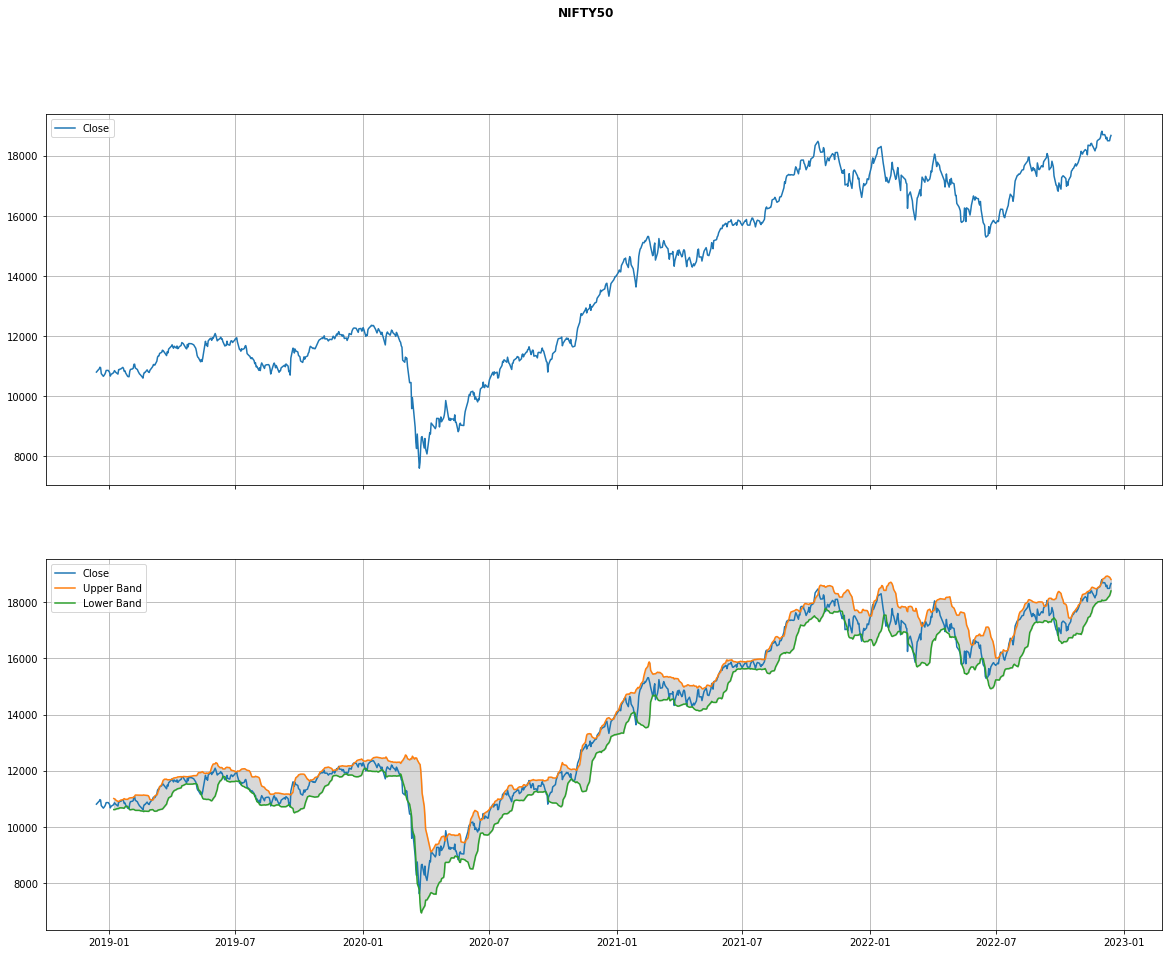

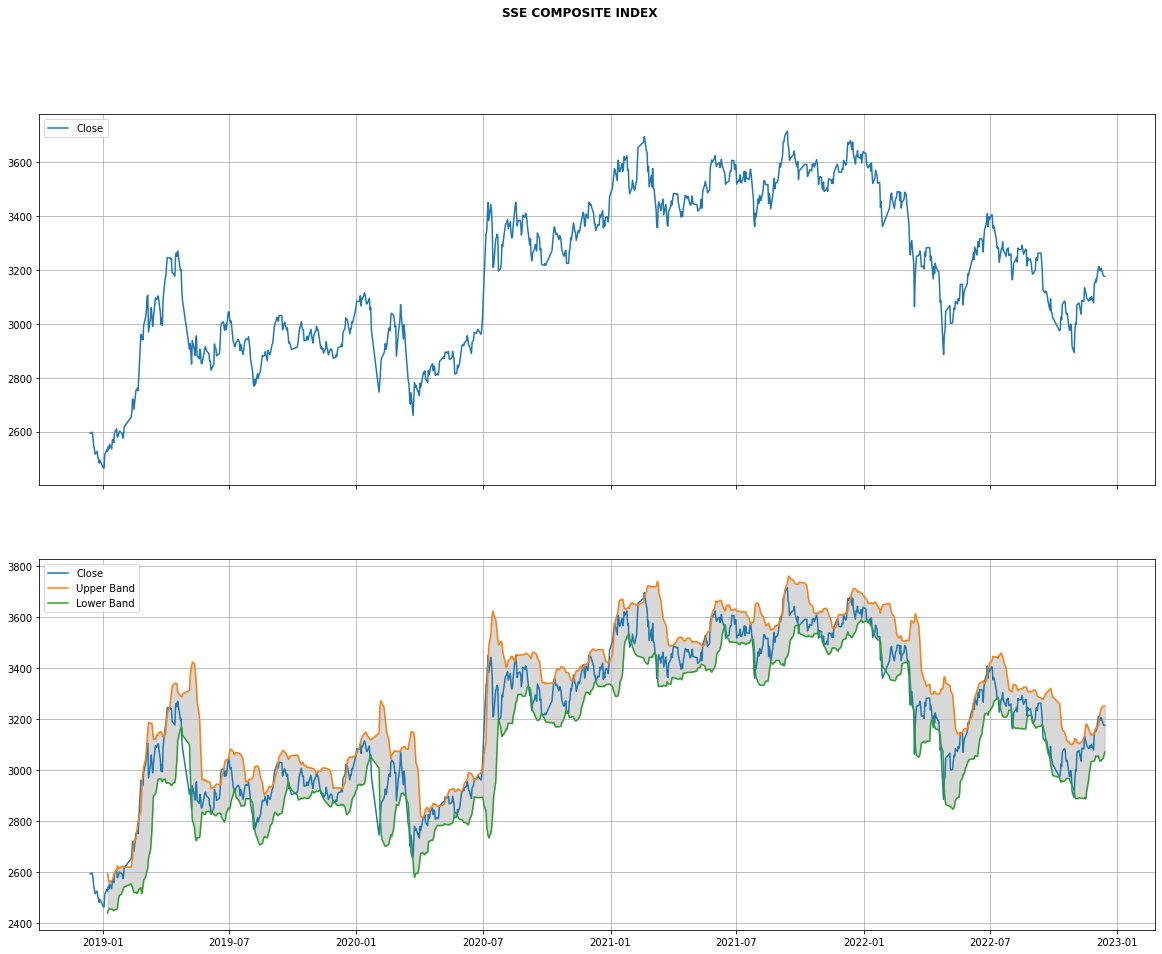

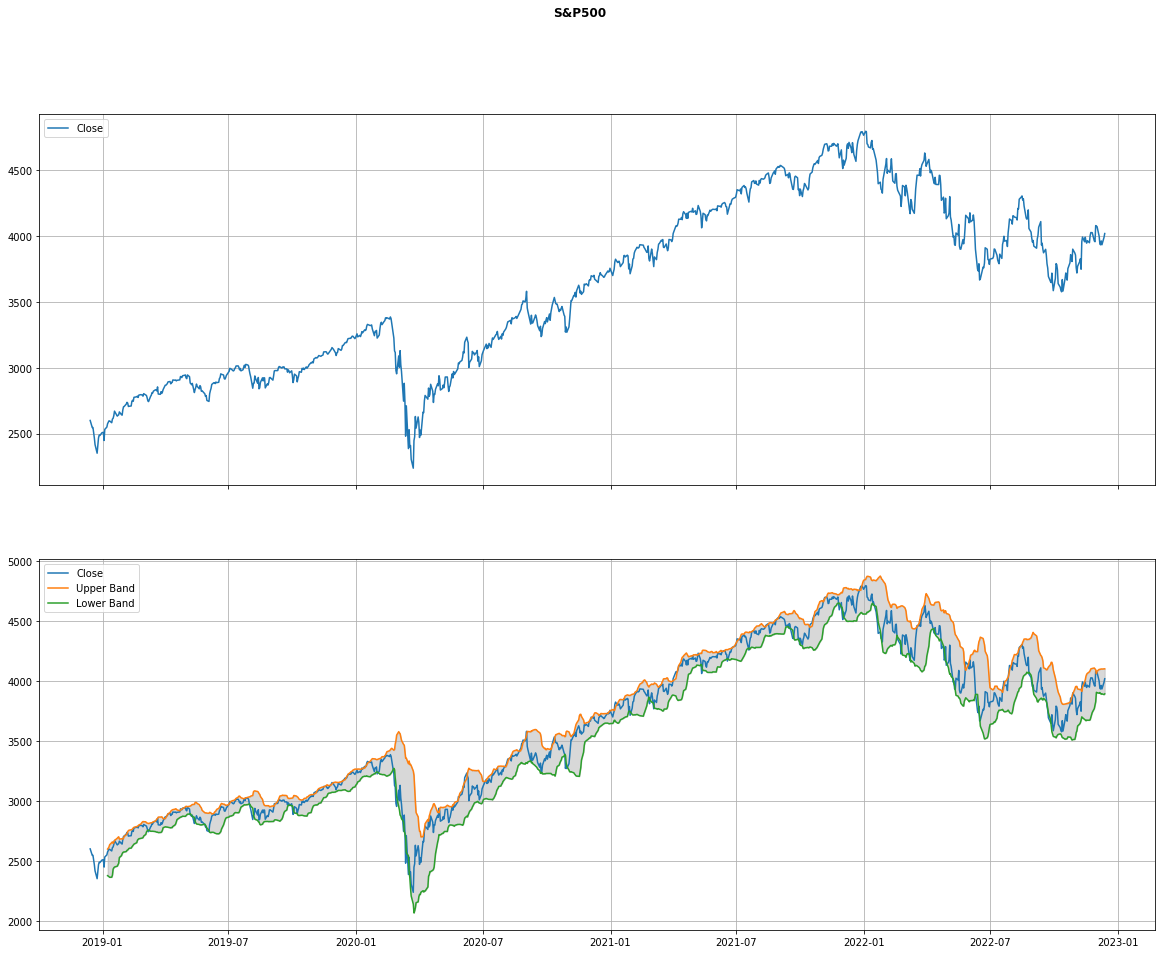

In [ ]:
# Initialize an empty list to store the returns of different indices 
bb_ret=[]
# Initialize a counter variable to keep track of the current index
i = 0
for indeX in indices:
  x = [indices[i]]

  # Download the data for the current index
  dataset2 = download_data(x)

  # Calculate the BB for the data
  bB = bb(dataset2)

  # Plot the BB for the data
  show_bb(bB, INDEX[i])
  
  # Calculate the buy and sell signals and returns for the data
  ret = find_returns_bb(dataset2, indices[i])
  bb_ret.append(ret)
  i=i+1

# Create a DataFrame
returns_bb = pd.DataFrame(list(zip(INDEX,bb_ret )),
                   
               # Name the columns 
               columns =['INDICES','B-BANDS RETURNS'])

# Set the index
returns_bb.set_index([pd.Index([1, 2, 3])])

## **MIXED STRATEGY**
Here we took both the indicators - '**MACD and B-Bands**' and used them simultaneously to make a mixed strategy. The strategy implemented in this code '**buys when the closing price of the asset is above the middle line of the Bollinger Bands, and the MACD is above the signal line**'. It gives a '**sell signal using the same B-Bands strategy**' we used above. We then evaluate the performance of the strategy by calculating the profits.


## **Calculate Returns using the Mixed Strategy**
We define '**mixed_strategy**' function that takes three arguments- '**two datasets**' (one for MACD and another one for B-Bands) and '**one index**' (for which the datasets were calculated). The function generates buy and sell signals based on the Mixed Strategy. It loops through the data in datasets and checks whether the current day's price is above the BB mid line. If this condition is satisfied then it checks whether the MACD line is above the signal line. If both of these conditions are satisfied, the function appends the current index to the buy list and sets the '**open_pos**' flag to True to indicate that a position has been opened. If open_pos is True, the function checks whether the previous day's value of the upper Bollinger Band (BU) is less than the previous day's closing price. If so, it checks whether the current day's value of the BU is greater than the current day's closing price. If both of these conditions are satisfied, the function appends the current index to the sell list and sets the open_pos flag to False to indicate that the position has been closed. Once the buy and sell signals have been generated, the function calculates the returns based on the buy and sell signals. 

In [ ]:
#dataset1 - MACD dataset
#dataset2 - BB dataset

def mixed_strategy(dataset1, dataset2, index):
  # Create empty lists to store buy and sell signals
  buy = []
  sell = []

  # Create a flag to track whether a position is currently open
  open_pos = False

  # Loop through the data in dataset2
  for i in range(len(dataset2)):

    # Check if a position is currently open
    if open_pos == False:

      # If the closing price is above the middle line of the Bollinger Bands
      # and the MACD is above the signal line, then generate a buy signal
      if dataset2.Close[i] > (dataset2.BU[i] + dataset2.BL[i]) / 2:
        if dataset1.MACD[i] > dataset1.signal[i]:
          buy.append(i)

          # Set the open_pos flag to True to indicate that a position is now open
          open_pos = True

    # If a position is currently open
    elif open_pos == True:

      # If the upper line of the Bollinger Bands is crossed downwards and
      # the closing price is below the middle line, then generate a sell signal
      if dataset2.BU[i - 1] < dataset2.Close[i - 1]:
        if dataset2.BU[i] > dataset2.Close[i]:
          sell.append(i)
          
          # Set the open_pos flag to False to indicate that the position is now closed
          open_pos = False

  # Concatenate the closing prices at the buy and sell signal indices from dataset1
  merged = pd.concat([dataset1.iloc[buy].Close, dataset1.iloc[sell].Close], axis=1)

  # Set the column names of the DataFrame to 'Buy' and 'Sell'
  merged.columns = ['Buy', 'Sell']

  # Calculate the total profit by subtracting the closing price at the sell signal
  # from the closing price at the buy signal, and shifting the sell signal down by one
  totalprofit = merged.shift(-1).Sell - merged.Buy

  # Calculate the percentage profit by dividing the total profit by the closing price at the buy signal
  percent_profits = (merged.shift(-1).Sell - merged.Buy) / merged.Buy
   
  return percent_profits.sum()

## **Implement the Mixed Strategy**

This code iterates over the indices and for each index, performs the following actions:

1. Downloads a dataset using the '**download_data**' function, passing the current index as an argument.
2. Calculates the MACD and signal line for the data using the '**macd**' function
3. Calculates the values for the SMA, STD, BU, and BL columns in the dataset using the '**bb function**'.
3. Calls the '**show_bb**' function, passing the resulting DataFrame and the current index as arguments.
4. Calls the '**mixed_strategy**' function, passing both the resulting DataFrames and the current index as arguments giving us the returns. 
At the end of each iteration, the i variable is incremented by one and we move over to the next index.
5. Present the returns generated in a tabular form by creating a seperate dataframe '**returns**'

In [ ]:
# Initialize an empty list to store the returns of different indices 
mixed_ret = []
# Initialize a counter variable to keep track of the current index
i = 0

# Loop through the indices
for index in indices:
  # Download the dataset for the current index
  x = [indices[i]]
  dataset1 = download_data(x)

  # Calculate the MACD for the dataset
  macD = macd(dataset1)

  # Download the dataset for the current index again
  dataset2 = download_data(x)

  # Calculate the Bollinger Bands for the dataset
  bB = bb(dataset2)

  # Generate buy and sell signals for the current index using the mixed_strategy function
  ret = mixed_strategy(dataset1, dataset2, indices[i])
  mixed_ret.append(ret)
  # Increment the counter variable
  i = i + 1

# Create a dataframe
returns = pd.DataFrame(list(zip(INDEX,macd_ret,bb_ret,mixed_ret )),
                  
               # Name the columns 
               columns =['INDICES', 'MACD RETURNS','B-BANDS RETURNS','MIXED STRATEGY RETURNS'])

# Set the index
returns.set_index([pd.Index([1, 2, 3])])

,INDICES,MACD RETURNS,B-BANDS RETURNS,MIXED STRATEGY RETURNS
1,NIFTY50,0.367171,0.242290,0.537578
2,SSE COMPOSITE INDEX,0.130354,0.145368,0.254061
3,S&P500,0.357748,0.288798,0.489347


## **OVERALL ANALYSIS**

Looking at the above returns table, we can conclude that the mixed strategy, in 
any of the market was the most profitable of the three strategies we used here. This is because while using a single indicator, certain price trends might go unnoticed in the complex financial markets. By using 2 indicators, the number of false signals generated and hence risk is minimised and returns are maximised by using the confirmation given by both the indicators. None of the indicator can be a standalone trading system, therefore using two or more indicators simultaneously is a much more profitable strategy. 





As MACD is a momentum indicator and B-Bands give us a range in which the price tends to move, both of them are quite different from each other which makes them combining together a very good idea (as both of them give us two different confirmations and when both of them give a buy signal, we get much better returns rather than using them alone).

We can see that returns in the Chinese market are not that good in comparision to other markets and even negative when we run this code on some timeframes as this market has been following sideways trend from the past few years. Also it has been observed that this market doesn't follow the global trends as the Indian or the US market. Therefore we can also conclude from this project that many of the strategies that work well on most markets doesn't work the same way on the Chinese market.

Another thing to be noted here is that any of the strategy we saw here would not work on short time frames as the indicators which we have used here works well only on long timeframes and they don't give buy or sell signal in a short period of time. Therefore the preferred time frame is '**2 years**' or more. Also the number of trades, on an average, which we recieve using these strategies ranges from 4-5 trades per year. The major reason behind this is that MACD and B-Bands were not made with the purpose of taking trades on standalone basis, but are generally used to confirm the momentum of market. Therefore, they give less number of trades in comparision to the new indicators but the chances of a fake signal is very less at the same time. 